In [2]:
# import all of the needed
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
import seaborn as sns

plt.style.use('seaborn')
np.random.seed(0)
np.set_printoptions(precision = 3,suppress =True)
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# read the data
mnist = input_data.read_data_sets('../../Dataset/MNIST/',one_hot=True)
train_data, train_label, test_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

# Show some details and vis some of them
print(train_data.shape)
print(train_data.min(),train_data.max())
print(train_label.shape)
print(train_label.min(),train_label.max())
print(test_data.shape)
print(test_data.min(),test_data.max())
print(test_label.shape)
print(test_label.min(),test_label.max())
print('-----------------------')

# view the data
def view_images(data,row=10,col=10,color=False):
    fig=plt.figure(figsize=(10, 10))
    columns = col;    rows = row
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if color:plt.imshow(data[i-1])
        else:    plt.imshow(data[i-1],cmap='gray')
        plt.grid(False)
        plt.axis('off')
    plt.show()

Extracting ../../Dataset/MNIST/train-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-labels-idx1-ubyte.gz
(55000, 784)
0.0 1.0
(55000, 10)
0.0 1.0
(10000, 784)
0.0 1.0
(10000, 10)
0.0 1.0
-----------------------


Computing LLE embedding


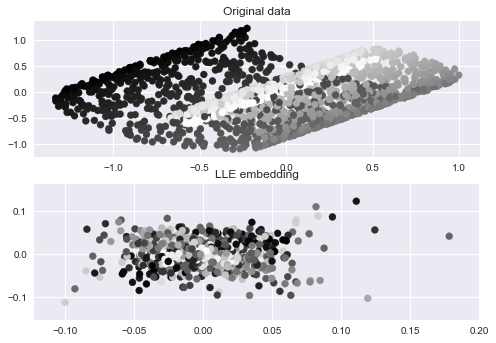

In [16]:
# locally linear embedding function
# Code: http://fa.bianp.net/blog/2011/locally-linear-embedding-and-sparse-eigensolvers/
# Code: 

from scipy.sparse import linalg, eye
################################################################################
# locally linear embedding function

from scipy.sparse import linalg, eye
from pyamg import smoothed_aggregation_solver
from sklearn import neighbors

def locally_linear_embedding(X, n_neighbors, out_dim, tol=1e-6, max_iter=200):
    W = neighbors.kneighbors_graph(
        X, n_neighbors=n_neighbors, mode='connectivity')
    # connectivity
    # distance

    # M = (I-W)' (I-W)
    A = eye(*W.shape, format=W.format) - W
    A = (A.T).dot(A).tocsr()

    # initial approximation to the eigenvectors
    X = np.random.rand(W.shape[0], out_dim)
    ml = smoothed_aggregation_solver(A, symmetry='symmetric')
    prec = ml.aspreconditioner()

    # compute eigenvalues and eigenvectors with LOBPCG
    eigen_values, eigen_vectors = linalg.lobpcg(
        A, X, M=prec, largest=False, tol=tol, maxiter=max_iter)

    index = np.argsort(eigen_values)
    return eigen_vectors[:, index], np.sum(eigen_values)


import numpy as np
import pylab as pl
################################################################################
# generate the swiss roll

n_samples, n_features = 2000, 3
n_turns, radius = 1.2, 1.0
rng = np.random.RandomState(0)
t = rng.uniform(low=0, high=1, size=n_samples)
data = np.zeros((n_samples, n_features))

# generate the 2D spiral data driven by a 1d parameter t
max_rot = n_turns * 2 * np.pi
data[:, 0] = radius = t * np.cos(t * max_rot)
data[:, 1] = radius = t * np.sin(t * max_rot)
data[:, 2] = rng.uniform(-1, 1.0, n_samples)
manifold = np.vstack((t * 2 - 1, data[:, 2])).T.copy()
colors = manifold[:, 0]

# rotate and plot original data
sp = pl.subplot(211)
U = np.dot(data, [[-.79, -.59, -.13],
                  [ .29, -.57,  .75],
                  [-.53,  .56,  .63]])
sp.scatter(U[:, 1], U[:, 2], c=colors)
sp.set_title("Original data")


print("Computing LLE embedding")
n_neighbors, out_dim = 12, 2
X_r, cost = locally_linear_embedding(data, n_neighbors, out_dim)

sp = pl.subplot(212)
sp.scatter(X_r[:,0], X_r[:,1], c=colors)
sp.set_title("LLE embedding")
pl.show()

# Reference
1. matplotlib, S. (2018). Seaborn configuration hides default matplotlib. Stack Overflow. Retrieved 12 November 2018, from https://stackoverflow.com/questions/33099348/seaborn-configuration-hides-default-matplotlib
2. 